In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install mediapipe

In [3]:
import cv2
import os
import shutil
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
shutil.rmtree('/content/con', ignore_errors=True)

In [5]:
# csv begin:
import pandas as pd

In [6]:
df = pd.read_csv("/content/dataset.csv",header=None)
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
# df = pd.DataFrame(y)
# print(y.shape)
print(df.iloc[:,0].values)

[ 2  3  2 ... 17 20 20]


In [8]:
data = df.to_numpy()
data.shape

(3696, 43)

In [9]:
training = data[0:3600]
testing = data[3600:]
print(training.shape)
print(testing.shape)

(3600, 43)
(96, 43)


In [10]:
training_x = training[:,1:]
training_y = training[:,0]
testing_x = training[:,1:]
testing_y = training[:,0]

print(training_x.shape)
print(training_y.shape)
print(testing_x.shape)
print(testing_y.shape)

(3600, 42)
(3600,)
(3600, 42)
(3600,)


In [11]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(42,)),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation='relu'),
  
  tf.keras.layers.Dense(26, activation='softmax')
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(training_x, training_y, epochs=30)
model.evaluate(testing_x, testing_y)

Epoch 1/30
113/113 [==============================] - 1s 3ms/step - loss: 2.3721 - accuracy: 0.3319
Epoch 2/30
113/113 [==============================] - 0s 3ms/step - loss: 1.1875 - accuracy: 0.6119
Epoch 3/30
113/113 [==============================] - 0s 3ms/step - loss: 0.7735 - accuracy: 0.7269
Epoch 4/30
113/113 [==============================] - 0s 3ms/step - loss: 0.5893 - accuracy: 0.7978
Epoch 5/30
113/113 [==============================] - 0s 3ms/step - loss: 0.4811 - accuracy: 0.8253
Epoch 6/30
113/113 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.8558
Epoch 7/30
113/113 [==============================] - 0s 3ms/step - loss: 0.3464 - accuracy: 0.8792
Epoch 8/30
113/113 [==============================] - 0s 3ms/step - loss: 0.2914 - accuracy: 0.9031
Epoch 9/30
113/113 [==============================] - 0s 3ms/step - loss: 0.2481 - accuracy: 0.9183
Epoch 10/30
113/113 [==============================] - 0s 3ms/step - loss: 0.2119 - accuracy: 0.9367

[0.02033454179763794, 0.9944444298744202]

In [ ]:
shutil.rmtree('/content/con', ignore_errors=True)

In [13]:
# model.save('first.h5')

tf.saved_model.save(model, '/content/con')

In [14]:
converter = tf.lite.TFLiteConverter.from_saved_model('/content/con') # path to the SavedModel directory
tflite_model = converter.convert()
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

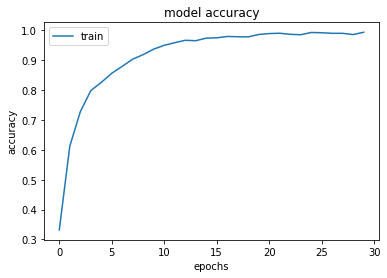

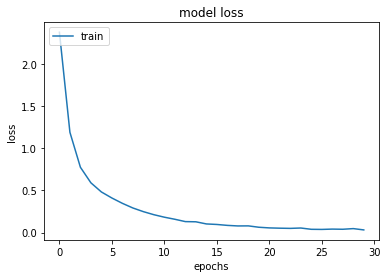

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train'], loc = 'upper left')
plt.show()